In [3]:
# https://www.youtube.com/watch?v=NNu1DjWcYeY&t=21s

import datetime as dt 
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import scipy.stats as stats
from pandas_datareader import data as pdf 
import plotly.offline as pyo 

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [4]:
end = dt.datetime.now()
start = dt.datetime(2018,1,1)
start, end

df = pdr.get_data_yahoo('CBA.AX', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,80.330002,79.779999,80.300003,80.220001,1284609.0,66.452858
2018-01-02,80.644997,80.059998,80.470001,80.139999,1349269.0,66.386597
2018-01-03,80.480003,79.809998,80.480003,79.970001,1596303.0,66.245781
2018-01-04,81.250000,80.370003,80.540001,81.160004,2208531.0,67.231552
2018-01-07,81.750000,81.300003,81.400002,81.620003,1293549.0,67.612602


In [5]:
#Simple vs log return

In [9]:
simple_returns = df.Close.pct_change().dropna()
simple_returns

Date
2018-01-02   -0.000997
2018-01-03   -0.002121
2018-01-04    0.014881
2018-01-07    0.005668
2018-01-08    0.006984
                ...   
2021-08-26    0.006679
2021-08-27    0.005446
2021-08-30   -0.011030
2021-08-31   -0.002987
2021-09-01    0.003396
Name: Close, Length: 929, dtype: float64

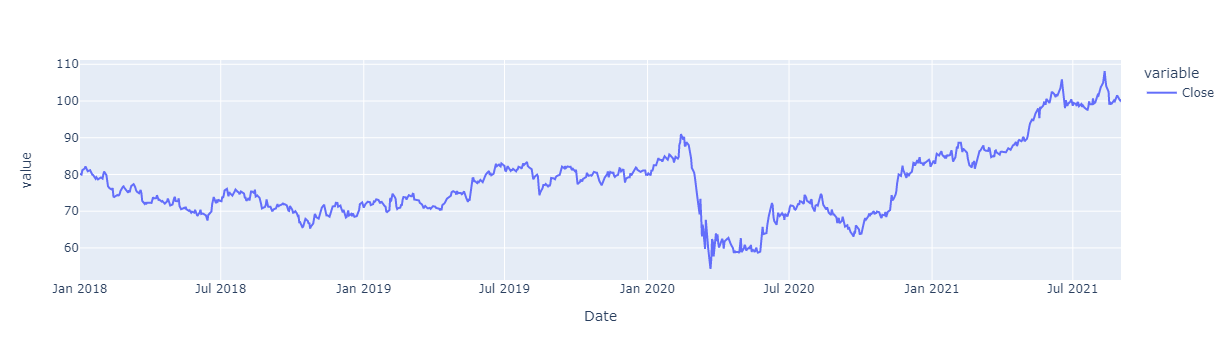

In [12]:
df.Close.plot().update_layout(autosize = False, width=500, height=300)

In [13]:
print('First', df.Close[0],'last',df.Close[-1])

First 80.22000122070312 last 100.45999908447266


In [15]:
simple_returns.mean()

0.00037122871496772064

In [16]:
df.Close[0]*(1+simple_returns.mean())**len(simple_returns)

113.2480283506542

In [20]:
df.Close[0]*np.prod([(1 + Rt) for Rt in simple_returns]) #Finds closing price 

100.4599990844724

In [23]:
log_returns =np.log(df.Close/df.Close.shift(1)).dropna()
log_returns

Date
2018-01-02   -0.000998
2018-01-03   -0.002124
2018-01-04    0.014771
2018-01-07    0.005652
2018-01-08    0.006959
                ...   
2021-08-26    0.006656
2021-08-27    0.005431
2021-08-30   -0.011091
2021-08-31   -0.002992
2021-09-01    0.003390
Name: Close, Length: 929, dtype: float64

In [24]:
log_returns.mean()

0.0002421816508608134

In [26]:
df.Close[0]*np.exp(log_returns.mean() * len(log_returns))

100.45999908447247

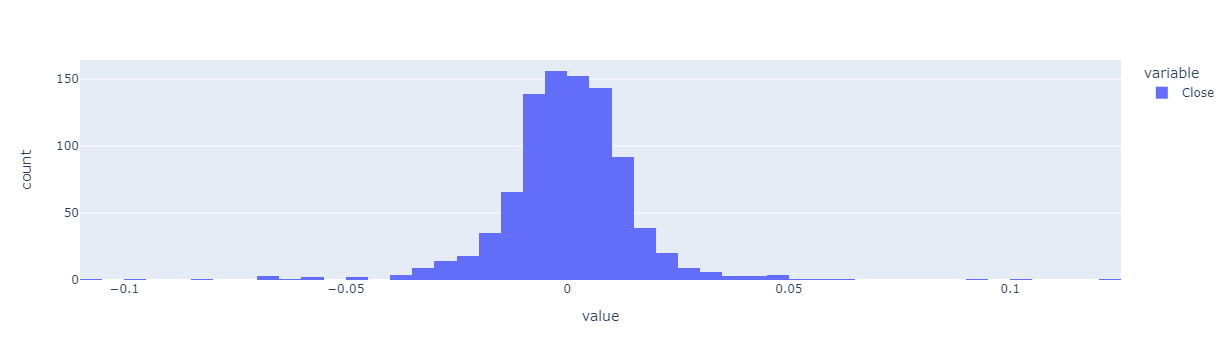

In [27]:
log_returns.plot(kind='hist')

In [36]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()
worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

In [38]:
std_worst = (worst - log_returns.mean())/log_returns.std()
std_best = (best - log_returns.mean())/log_returns.std()

In [44]:
print('std dev. worst %.2f best %.2f'%(std_worst,std_best))
print('Probabilty worse %.10f best %.14f '%(stats.norm(0,1).pdf(std_worst), stats.norm(0,1).pdf(std_best)))

std dev. worst -6.58 best 7.74
Probabilty worse 0.0000000002 best 0.00000000000004 


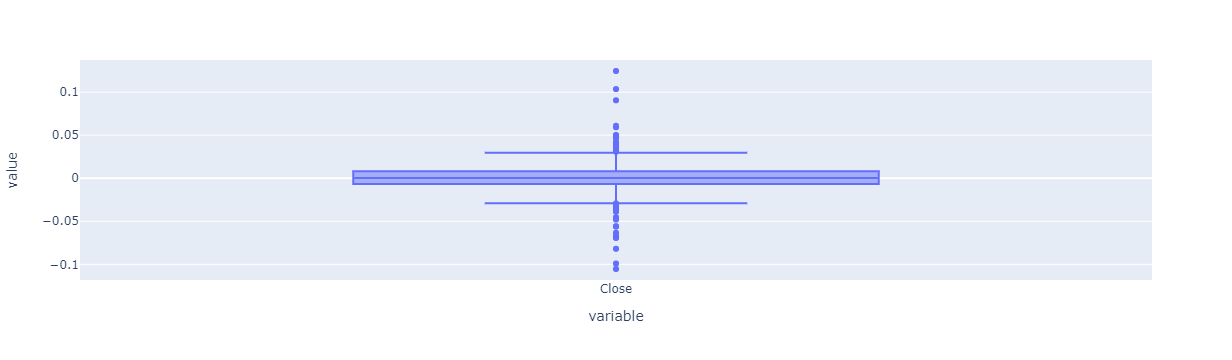

In [46]:
log_returns.plot(kind='box').update_layout(autosize = False, width=500, height=300)

In [51]:
ks_stat, p_value = stats.kstest(log_returns, 'norm')
print(ks_stat, p_value)
if p_value > 0.05:
    print('Probably Guassian')
else:
    print('Not Guassian')

0.47459330651394627 1.1293140536481588e-192
Not Guassian
